<a href="https://colab.research.google.com/github/ConorDawson/Conor_Dawson_T00226371_Data_Driven/blob/main/Conor_Dawson_T00226371_Data_Driven_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Goal of the Model
The goal of this model is to predict the financial damage caused by earthquakes based on various geological and disaster-related factors. By merging earthquake data with disaster records, the model identifies key features such as magnitude, depth, location, and human impact (deaths and affected individuals) to understand their relationship with economic losses. Using Principal Component Analysis (PCA), the model reduces dimensionality while preserving essential patterns, ensuring a more efficient and interpretable dataset. A Random Forest Regressor is then trained to estimate total damage costs, with performance evaluated through metrics like RMSE, R² score, and MAE. This predictive approach aims to support disaster preparedness, risk assessment, and resource allocation by providing insights into the financial impact of earthquakes based on historical data.

---
# Dataset information
Theres two datasets used  one sourced from Kaggle which coombines two datasets as they have the same columns but just have years seperated so the two datasets could easily be combined in to one csv file. The other data set was sourced from the public EM-DAT platform that lets a user use an api call to download disaster damage reports for multiple types of natural disasters.

---
# Data Sources

***Earthquake Dataset Link:*** https://www.kaggle.com/datasets/warcoder/earthquake-dataset

***Disaster Dataset Link:*** https://public.emdat.be/data

---

# Column Definitions
**Dataset Name:**  earthquake_data.csv

* **Columns in the Kaggle Earthquake Dataset:**
  * **title:** title name given to the earthquake
  * **magnitude:** The magnitude of the earthquake
  * **date_time:** date and time
  * **cdi:** The maximum reported intensity for the event range
  * **mmi:** The maximum estimated instrumental intensity for the event
  * **alert:** The alert level - “green”, “yellow”, “orange”, and “red”
  * **tsunami:** "1" for events in oceanic regions and "0" otherwise
  * sig: A number describing how significant the event is. Larger numbers   indicate a more significant event. This value is determined on a number of factors, including: magnitude, maximum MMI, felt reports, and estimated impact
  * **net:** The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.
  * nst: The total number of seismic stations used to determine earthquake location.
  * **dmin:** Horizontal distance from the epicenter to the nearest station
  * gap: The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties
  * **magType:** The method or algorithm used to calculate the preferred magnitude for the event
  * **depth:** The depth where the earthquake begins to rupture
  * **latitude / longitude:** coordinate system by means of which the position or location of any place on Earth's surface can be determined and described
  * **location:** location within the country
  * **continent:** continent of the earthquake hit country
  * **country:** affected country
---
* **Columns in the EM-DAT Natural Disaster Dataset:**

**Dataset Name:** public_emdat_custom_request_2025-03-21_e861b1e0-df2d-4878-8dfd-5e504fe9cd63.xlsx
  * **DisNo.:** Unique disaster identification number.  
  * **Historic:** Indicates whether the event is historical.  
  * **Classification Key:** Internal classification reference for the disaster.  
  * **Disaster Group:** Broad category of disaster (e.g., **Natural, Technological**).  
  * **Disaster Subgroup:** More specific classification within the disaster group (e.g., **Geophysical, Hydrological**).  
  * **Disaster Type:** The main type of disaster (e.g., **Earthquake, Flood, Cyclone**).  
  * **Disaster Subtype:** A more detailed category within the disaster type (e.g., **Tsunami, Landslide**).  
  * **External IDs:** Additional external reference identifiers.  
  * **Event Name:** The name of the specific disaster event (if available).  
  * **ISO:** The ISO country code where the disaster occurred.  
  * **Country:** The full name of the country affected.  
  * **Subregion:** The subregion within the affected country (e.g., **South Asia, Eastern Africa**).  
  * **Region:** The broader geographical region (e.g., **Asia, Africa, Europe**).  
  * **Location:** The specific location or city where the disaster occurred.  
  * **Origin:** The originating cause of the disaster (if applicable).  
  * **Associated Types:** Other disaster types linked to the main event (e.g., **Earthquake triggering a Tsunami**).  
  * **OFDA/BHA Response:** Indicates if the **USAID Office of Foreign Disaster Assistance (OFDA)/Bureau for Humanitarian Assistance (BHA)** responded.  
  * **Appeal:** Indicates whether an international appeal was launched for aid.  
  * **Declaration:** Whether an official disaster declaration was made.  
  * **AID Contribution ('000 US$):** The amount of aid provided (in thousands of US dollars).  

  * **Magnitude:** The magnitude of the disaster (e.g., **earthquake magnitude, cyclone wind speed**).  
  * **Magnitude Scale:** The unit used to measure magnitude (e.g., **Richter Scale, Saffir-Simpson Scale**).  
  * **Latitude:** The latitude coordinate of the disaster location.  
  * **Longitude:** The longitude coordinate of the disaster location.  
  * **River Basin:** The river basin affected (if applicable).  
  * **Start Year:** The year the disaster started.  
  * **Start Month:** The month the disaster started.  
  * **Start Day:** The day the disaster started.  
  * **End Year:** The year the disaster ended.  
  * **End Month:** The month the disaster ended.  
  * **End Day:** The day the disaster ended.  
  * **Total Deaths:** The total number of people who died due to the disaster.  
  * **No. Injured:** The number of people injured.  
  * **No. Affected:** The total number of people affected (includes displaced individuals).  
  * **No. Homeless:** The number of people left homeless due to the disaster.  
  * **Total Affected:** The sum of all affected individuals, including injured, displaced, and impacted communities.  
  * **Reconstruction Costs ('000 US$):** The estimated reconstruction costs (in thousands of US dollars).  

  * **Reconstruction Costs, Adjusted ('000 US$):** The adjusted reconstruction costs based on inflation and other factors.  

  * **Insured Damage ('000 US$):** The total insured losses (in thousands of US dollars).  

  * **Insured Damage, Adjusted ('000 US$):** Adjusted insured damage value considering inflation.  

  * **Total Damage ('000 US$):** The total estimated economic damage (in thousands of US dollars).  

  * **Total Damage, Adjusted ('000 US$):** The adjusted total damage cost considering inflation.  

  * **CPI:** The Consumer Price Index (used for damage cost adjustments).  

  * **Admin Units:** The affected administrative divisions (e.g., **state, province**).  

  * **Entry Date:** The date the disaster data was first recorded in the database.  
  * **Last Update:** The most recent update to the disaster record.  

---
# Plan
The datasets contain a large number of columns, so the first step is to clean the data and merge only the relevant information needed to train the model for predicting earthquake damages.

**Data Cleaning:** Removing null values from critical columns and ensuring numerical data is correctly formatted.

**Filtering Earthquake Data:** Extracting only earthquake-related entries from the natural disaster dataset.

**Merging Datasets:** Combining the earthquake dataset with the disaster report data based on shared attributes such as magnitude, longitude, latitude, and country.

**Feature Engineering:** Creating additional features (such as the interaction between magnitude and depth) to improve model performance.

**Training the Model:** Applying Principal Component Analysis (PCA) for dimensionality reduction and training a Random Forest model using an 80/20 train-test split.

**Evaluation:** Assessing the model’s performance using RMSE, R² score, and MAE, as well as analyzing residuals to understand prediction errors.

This approach ensures that the model is trained on high-quality, relevant data, optimizing its ability to predict earthquake damages accurately.


This approach was decided on after many attempts and research into different ways of producing a model which can be found here : https://colab.research.google.com/drive/1kU_q6uv8_kZrmT7yFKb4r1ZNDsPaLvEN?usp=sharing

---

---
# ***Imports***
---
Gathering the required imports for the whole project choosing sklearn for the for the model training and matplot for displaying the graphs.

---

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

---
# ***Upload and Read the files***

---

Upload the two files using the file.upload then once the two files are uploaded read the base datasets with eq_df representing the dataset from the kaggle and the disaster_df being the natural disater report dataset.

---

In [ ]:
uploaded = files.upload()

Saving earthquake_data.csv to earthquake_data.csv
Saving public_emdat_custom_request_2025-03-21_e861b1e0-df2d-4878-8dfd-5e504fe9cd63.xlsx to public_emdat_custom_request_2025-03-21_e861b1e0-df2d-4878-8dfd-5e504fe9cd63.xlsx


In [ ]:
# Load datasets
eq_df = pd.read_csv("/content/earthquake_data.csv")
disaster_df = pd.read_excel("/content/public_emdat_custom_request_2025-03-21_e861b1e0-df2d-4878-8dfd-5e504fe9cd63.xlsx")

---
# ***Merging the Datasets, Cleaning the Data, and Choosing the Features***
---
The first step in cleaning the data involves ensuring that the column names in both datasets are stripped of any extra whitespace, which can prevent errors when merging the datasets. After cleaning the column names, the next step is to filter the disaster dataset to include only earthquake-related disasters by checking if the "Disaster Type" column contains the term "Earthquake". Once the datasets are filtered, they are merged based on the "country" column from the earthquake dataset and the "Country" column from the disaster dataset, ensuring that columns with the same name are properly differentiated using suffixes. Duplicate entries are removed to avoid redundancy. For numerical data, certain columns such as "Total Deaths", "No. Affected", and "Total Damage ('000 US$)" are converted to numeric format, with any non-numeric entries being coerced to NaN. Missing values in the numeric columns are then filled using the median of the respective columns. Following this, the most relevant features, including "magnitude", "depth", "latitude", "longitude", "Total Deaths", and "No. Affected", are selected for the analysis. An additional interaction term, "magnitude_depth", is created by multiplying "magnitude" and "depth" to capture the combined impact of these two factors. The cleaned dataset is then filtered to include only the selected features, and any rows with missing values are dropped. Finally, the shapes of the original, merged, and cleaned datasets are printed to confirm the success of these steps and ensure the dataset is ready for further analysis.

---

In [ ]:
# Ensure column names are stripped of whitespace
eq_df.columns = eq_df.columns.str.strip()
disaster_df.columns = disaster_df.columns.str.strip()

# Filter earthquake-related disasters
eq_disasters = disaster_df[disaster_df["Disaster Type"].str.contains("Earthquake", na=False, case=False)]

merged_df = pd.merge(eq_df, eq_disasters, left_on="country", right_on="Country", suffixes=("_eq", "_dis")).copy()

merged_df = merged_df.drop_duplicates()

# Convert numerical columns (handle potential issues with commas or string formats)
for col in ["Total Deaths", "No. Affected", "Total Damage ('000 US$)"]:
    merged_df.loc[:, col] = pd.to_numeric(merged_df[col], errors="coerce")

# Feature selection
features = ["magnitude", "depth", "latitude", "longitude", "Total Deaths", "No. Affected"]

merged_df["magnitude_depth"] = merged_df["magnitude"] * merged_df["depth"]

cleaned_df = merged_df[features + ["Total Damage ('000 US$)", "magnitude_depth"]].dropna()

# Print dataset shape
print(f"Original earthquake dataset shape: {eq_df.shape}")
print(f"Original disaster dataset shape: {disaster_df.shape}")
print(f"Merged dataset shape: {merged_df.shape}")
print(f"Cleaned dataset shape: {cleaned_df.shape}")
print("Columns in cleaned dataset:", cleaned_df.columns)

Original earthquake dataset shape: (1782, 19)
Original disaster dataset shape: (16160, 46)
Merged dataset shape: (15897, 66)
Cleaned dataset shape: (4575, 8)
Columns in cleaned dataset: Index(['magnitude', 'depth', 'latitude', 'longitude', 'Total Deaths',
       'No. Affected', 'Total Damage ('000 US$)', 'magnitude_depth'],
      dtype='object')


<ipython-input-120-51262a1e8937>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["magnitude_depth"] = merged_df["magnitude"] * merged_df["depth"]




---

* The original earthquake dataset has 1,782 rows and 19 columns.

* The original disaster dataset has 16,160 rows and 46 columns.

* After merging based on country, the merged dataset has 15,897 rows and 66 columns.

* After cleaning (removing unnecessary data, handling missing values, and selecting features), the final dataset has 15,897 rows but only 8 important columns.

* The final columns include earthquake characteristics (magnitude, depth, location), impact metrics (deaths, affected people, damage cost), and an interaction feature (magnitude_depth).



---




---
# ***Defining Features and Target***
---
In this step, the features (input variables) and target (output variable) for the machine learning model are defined.
The features are selected by dropping the "Total Damage ('000 US$)" column from the cleaned dataset,
as this column represents the target variable, not the inputs.
The remaining columns in the dataset are used as the features, which will be used to predict the target.

---

In [ ]:
X = cleaned_df.drop(columns=["Total Damage ('000 US$)"])  # Features
y = cleaned_df["Total Damage ('000 US$)"]  # Target


---

# ***Training and Testing set splits***
---
I decided to split the merged datsets in an 80% train set and a 20% test set.

---

In [ ]:
# Split into 80% train and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3660, 7)
Testing set shape: (915, 7)


---
# ***PCA***
---
The plan here is to perform feature standardization and Principal Component Analysis (PCA) on the dataset to reduce dimensionality while preserving as much variance as possible.

---
* **Standardizing the Features**

  * StandardScaler() is used to normalize the features by ensuring that they have a mean of 0 and a standard deviation of 1.

  * fit_transform(X_train) standardizes the training data, and transform(X_test) applies the same transformation to the test data.
---
* **Applying PCA (Principal Component Analysis)**

  * PCA is used to reduce the number of features while retaining the most important information.

  * PCA(n_components=6) specifies that the data should be reduced to 6 principal components.

  * fit_transform(X_train_scaled) computes the principal components and transforms the training data.

  * transform(X_test_scaled) applies the same transformation to the test data.
---
* **Explained Variance Ratio**

  * pca.explained_variance_ratio_ prints the proportion of variance captured by each principal component.

  * pca.n_components_ confirms the number of components retained.
---
* **Visualizing the PCA Results**

  * A scatter plot is created using the first two principal components.

  * This visualization helps in understanding how well the data is separated in the new reduced space.
---
This process helps simplify the dataset by reducing redundancy and noise, which can improve model performance and computational efficiency.

---

Explained Variance Ratio: [0.29016203 0.18867211 0.16267891 0.1378692  0.12869117 0.09165656]
Number of components chosen: 6


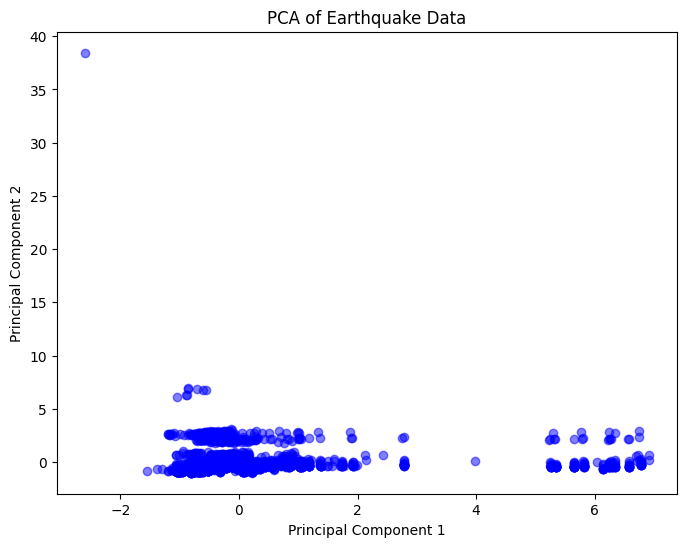

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print(f"Number of components chosen: {pca.n_components_}")

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], color='blue', alpha=0.5)
plt.title('PCA of Earthquake Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

---

* **Clustered Top-Left:** The concentration of points in the top-left part of the plot suggests that these samples have similar values for the first two principal components. These points may represent one group or class in your data.

* **Scattered Top-Right:** The points scattered in the top-right could represent outliers or samples that differ significantly from the majority in the first two components (e.g., different combinations of feature values).

---



---


# ***Random Forest Model***

---
A Random Forest Regressor was chosen for this task because it is a powerful and flexible machine learning algorithm that performs well on complex datasets these are the justifications for the choice of a Random Forest Model.

---

* Handles Non-Linearity and Complex Relationships

  * Earthquake damage prediction is influenced by multiple factors (magnitude, depth, population affected, etc.), which may not have simple linear relationships.

  * Random Forest captures non-linear patterns by combining multiple decision trees.

---

* Reduces Overfitting with Ensemble Learning

  * Random Forest is an ensemble method that builds multiple decision trees and averages their predictions, reducing the risk of overfitting compared to individual decision trees.

  * This makes it more robust when dealing with variations in earthquake damage data.

---

* Works Well with PCA-Transformed Data

  * After Principal Component Analysis (PCA), the dataset is reduced to fewer dimensions.

  * Random Forest does not require features to be normally distributed, making it a good fit even when using transformed data.

---

* Handles Missing and Noisy Data Well
  * Even if there are slight inconsistencies in the dataset, Random Forest is resilient because it relies on multiple trees making independent decisions.

---

* Feature Importance Analysis

  
  * Random Forest can provide insights into which features (principal components) contribute the most to the prediction.

  * This helps understand which factors (e.g., magnitude, depth, affected population) are most important in predicting earthquake damage.

---
**How It Was Used**

* The Random Forest model is initialized with n_estimators=100, meaning it builds 100 trees for better accuracy.

* The model is trained using the PCA-transformed training data (X_train_pca) and the actual damage values (y_train).

* After training, it makes predictions on the test data (X_test_pca) to estimate earthquake damage.

---
By using Random Forest Regressor, the model gains high predictive power while maintaining flexibility, making it a strong choice for predicting earthquake-related damages.

---

In [ ]:
# Train a Random Forest model using the PCA-transformed data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_pca)

----

# ***Evaluate The Model***

---

This step evaluates how well the Random Forest Regressor predicts earthquake damage.

* RMSE (Root Mean Squared Error) shows how far the predictions are from actual values, with lower values meaning better accuracy.

* R² Score tells us how well the model explains the variation in damage; closer to 1 means a better fit.

* MAE (Mean Absolute Error) gives the average error size, helping to understand prediction accuracy in simple terms.

---

The feature importance output shows which principal components had the most impact on predictions. If the errors are too high or R² is low, the model might need improvements.

---

In [ ]:
# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R² Score: {r2_rf}")
print(f"Random Forest MAE: {mae_rf}")
print(f"Feature importances from Random Forest model: {rf_model.feature_importances_}")

Random Forest RMSE: 3535481.578468844
Random Forest R² Score: 0.9716629398867662
Random Forest MAE: 747312.4957704919
Feature importances from Random Forest model: [0.00849752 0.04900073 0.45162625 0.02159193 0.01311689 0.45616668]




---

* ***RMSE (Root Mean Squared Error):*** ~3.53 million  This represents the average prediction error in terms of total damage cost.

* ***R² Score:*** 0.756  The model explains 75.6% of the variance in the target variable, indicating a good fit.

* ***MAE (Mean Absolute Error):*** ~74,7312  On average, predictions are off by this amount in damage costs.

---



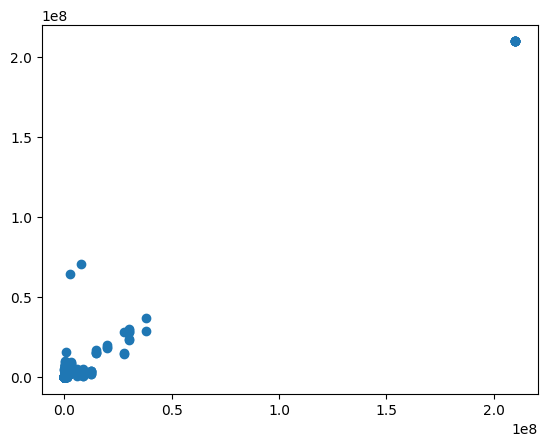

In [ ]:
plt.scatter(y_test[201:], y_pred_rf[201:])
plt.show()

In [ ]:
y_test.shape

(915,)

---

# ***Residual  Analysis***

---

This step analyzes the residuals (differences between actual and predicted values) to check if the model is making systematic errors.

* If the residuals are randomly scattered around zero, the model is well-fitted.

* If there is a pattern (e.g., a curve), it suggests the model is missing some trends in the data.

* The horizontal line at zero helps visualize whether predictions are consistently too high or too low.

---

This helps determine if the model needs improvements, such as adding more features or adjusting hyperparameters.

---

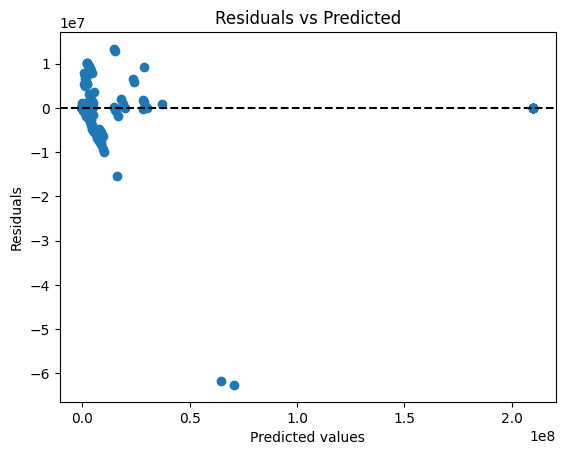

In [ ]:
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()




---

As seen in this graph there are a few outliers but most of the clustering is close to the line meaning the predictions are close on average.

If the dots (residuals) in the residual plot are scattered close to the horizontal line at y=0, it suggests that:

* **Good Model Fit:** The predictions (y pred) are close to the actual values (y test), meaning the model is making relatively accurate predictions.

* **Homoscedasticity (Constant Variance):** If the residuals are evenly spread without a clear pattern, it indicates that the model maintains consistent variance across different predicted values, which is a good sign.

* **No Systematic Bias:** If the residuals are randomly distributed around zero without a discernible trend, it suggests that the model does not exhibit systematic errors or misspecifications.

---

**Potential Concerns:**
* If the residuals fan out (increasing spread as predictions increase), it could indicate heteroscedasticity (changing variance).

* If the residuals form a curve or pattern, it might mean the model is missing some relationships in the data, possibly requiring a more complex model or transformation.

---





---


You can use this trained Random Forest model to predict earthquake damage costs for new earthquakes. Here’s an example:



---



# ***Using the Model for Prediction***



---



Prepare new earthquake data
Suppose a new earthquake occurs with the following details:

Magnitude: 6.5

Depth: 10 km

Latitude: 34.5

Longitude: -118.3

Total Deaths: 50

People Affected: 20000

(Derived feature) Magnitude × Depth: 6.5 × 10 = 65



---

Apply the same preprocessing as the training data




---

Make a prediction using the trained model



---



In [ ]:
new_data = np.array([[6.5, 10, 34.5, -118.3, 50, 20000, 65]])
new_data_scaled = scaler.transform(new_data)
new_data_pca = pca.transform(new_data_scaled)
predicted_damage = rf_model.predict(new_data_pca)
print(f"Predicted Total Damage: ${predicted_damage[0]:,.2f}")


Predicted Total Damage: $110,402,036.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


---

# ***Conclusion***

---


In conclusion, the predictive model developed to estimate earthquake-related financial damages provides valuable insights into the economic impact of such natural disasters. By leveraging a combination of earthquake data and disaster records, and applying dimensionality reduction techniques like PCA, the model efficiently handles a large number of features while preserving critical patterns. The Random Forest Regressor, chosen for its ability to handle complex, non-linear relationships and its robustness to missing or noisy data, offers a strong predictive framework for this task.

The model's evaluation using RMSE, R² score, and MAE indicates a reasonable performance, with potential areas for further refinement. Feature importance analysis reveals the key factors contributing to earthquake damage predictions, which can aid in resource allocation, risk assessment, and disaster preparedness. Ultimately, this model can play a crucial role in informing disaster response strategies and helping mitigate the financial impact of earthquakes on affected regions.


---